# Model Visualization

This notebook visualizes the results of the model predictions.

In [9]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score, accuracy_score

# Set style for better visualizations
plt.style.use('ggplot')
sns.set(font_scale=1.2)

### Load Processed Test Data

In [10]:
# Load processed test data
base_path = 'processed_data/'

# Load test data
X_test_mat_f = pd.read_csv(f'{base_path}X_Pmat_full_enhanced_test.csv')
X_test_mat_m = pd.read_csv(f'{base_path}X_PmatM_enhanced_test.csv')
y_test_mat_f = pd.read_csv(f'{base_path}y_Pmat_full_enhanced_test.csv')
y_test_mat_m = pd.read_csv(f'{base_path}y_PmatM_enhanced_test.csv')

X_test_por_f = pd.read_csv(f'{base_path}X_Ppor_full_enhanced_test.csv')
X_test_por_m = pd.read_csv(f'{base_path}X_PporM_enhanced_test.csv')
y_test_por_f = pd.read_csv(f'{base_path}y_Ppor_full_enhanced_test.csv')
y_test_por_m = pd.read_csv(f'{base_path}y_PporM_enhanced_test.csv')

print("Test data loaded successfully")

Test data loaded successfully


### Outline classifications and load trained models

In [11]:
# Define the educational grade bins function
def classify_grades_edu(grade_series):
    """
    Classify grades into meaningful educational categories using fixed width bins:
    - 0-5: Poor (0)
    - 6-10: Below Average (1)
    - 11-14: Average (2)
    - 15-17: Good (3)
    - 18-20: Excellent (4)
    """
    grades = grade_series.values
    bins = [0, 5, 10, 14, 17, 20]
    labels = [0, 1, 2, 3, 4]
    
    # Create categorical bins using educational scale
    binned_grades = pd.cut(grades, bins=bins, labels=labels, include_lowest=True)
    
    # Convert to numeric for the model
    return pd.to_numeric(binned_grades)

# Define readable bin names for plots
bin_names = ["Poor (0-5)", "Below Average (6-10)", "Average (11-14)", "Good (15-17)", "Excellent (18-20)"]

# Load trained models
rf_g1_mat_f = joblib.load('models/math_female_G1_model.joblib')
rf_g2_mat_f = joblib.load('models/math_female_G2_model.joblib')
lr_g3_mat_f = joblib.load('models/math_female_G3_model.joblib')

rf_g1_mat_m = joblib.load('models/math_male_G1_model.joblib')
rf_g2_mat_m = joblib.load('models/math_male_G2_model.joblib')
lr_g3_mat_m = joblib.load('models/math_male_G3_model.joblib')

rf_g1_por_f = joblib.load('models/por_female_G1_model.joblib')
rf_g2_por_f = joblib.load('models/por_female_G2_model.joblib')
lr_g3_por_f = joblib.load('models/por_female_G3_model.joblib')

rf_g1_por_m = joblib.load('models/por_male_G1_model.joblib')
rf_g2_por_m = joblib.load('models/por_male_G2_model.joblib')
lr_g3_por_m = joblib.load('models/por_male_G3_model.joblib')

print("Models loaded successfully")

Models loaded successfully


### Make predictions

In [12]:
# Make predictions
print("Making predictions...")

# Make predictions for G1 and G2 (classification)
y_pred_g1_mat_f = rf_g1_mat_f.predict(X_test_mat_f)
y_pred_g2_mat_f = rf_g2_mat_f.predict(X_test_mat_f)

y_pred_g1_mat_m = rf_g1_mat_m.predict(X_test_mat_m)
y_pred_g2_mat_m = rf_g2_mat_m.predict(X_test_mat_m)

y_pred_g1_por_f = rf_g1_por_f.predict(X_test_por_f)
y_pred_g2_por_f = rf_g2_por_f.predict(X_test_por_f)

y_pred_g1_por_m = rf_g1_por_m.predict(X_test_por_m)
y_pred_g2_por_m = rf_g2_por_m.predict(X_test_por_m)

# Make predictions for G3 (regression)
# For G3, we need to include G1 and G2 as features
X_g3_mat_f = pd.concat([X_test_mat_f, y_test_mat_f[['G1', 'G2']]], axis=1)
X_g3_mat_m = pd.concat([X_test_mat_m, y_test_mat_m[['G1', 'G2']]], axis=1)
X_g3_por_f = pd.concat([X_test_por_f, y_test_por_f[['G1', 'G2']]], axis=1)
X_g3_por_m = pd.concat([X_test_por_m, y_test_por_m[['G1', 'G2']]], axis=1)

y_pred_g3_mat_f = lr_g3_mat_f.predict(X_g3_mat_f)
y_pred_g3_mat_m = lr_g3_mat_m.predict(X_g3_mat_m)
y_pred_g3_por_f = lr_g3_por_f.predict(X_g3_por_f)
y_pred_g3_por_m = lr_g3_por_m.predict(X_g3_por_m)

print("Predictions completed")

Making predictions...
Predictions completed


### Visualize Predictions

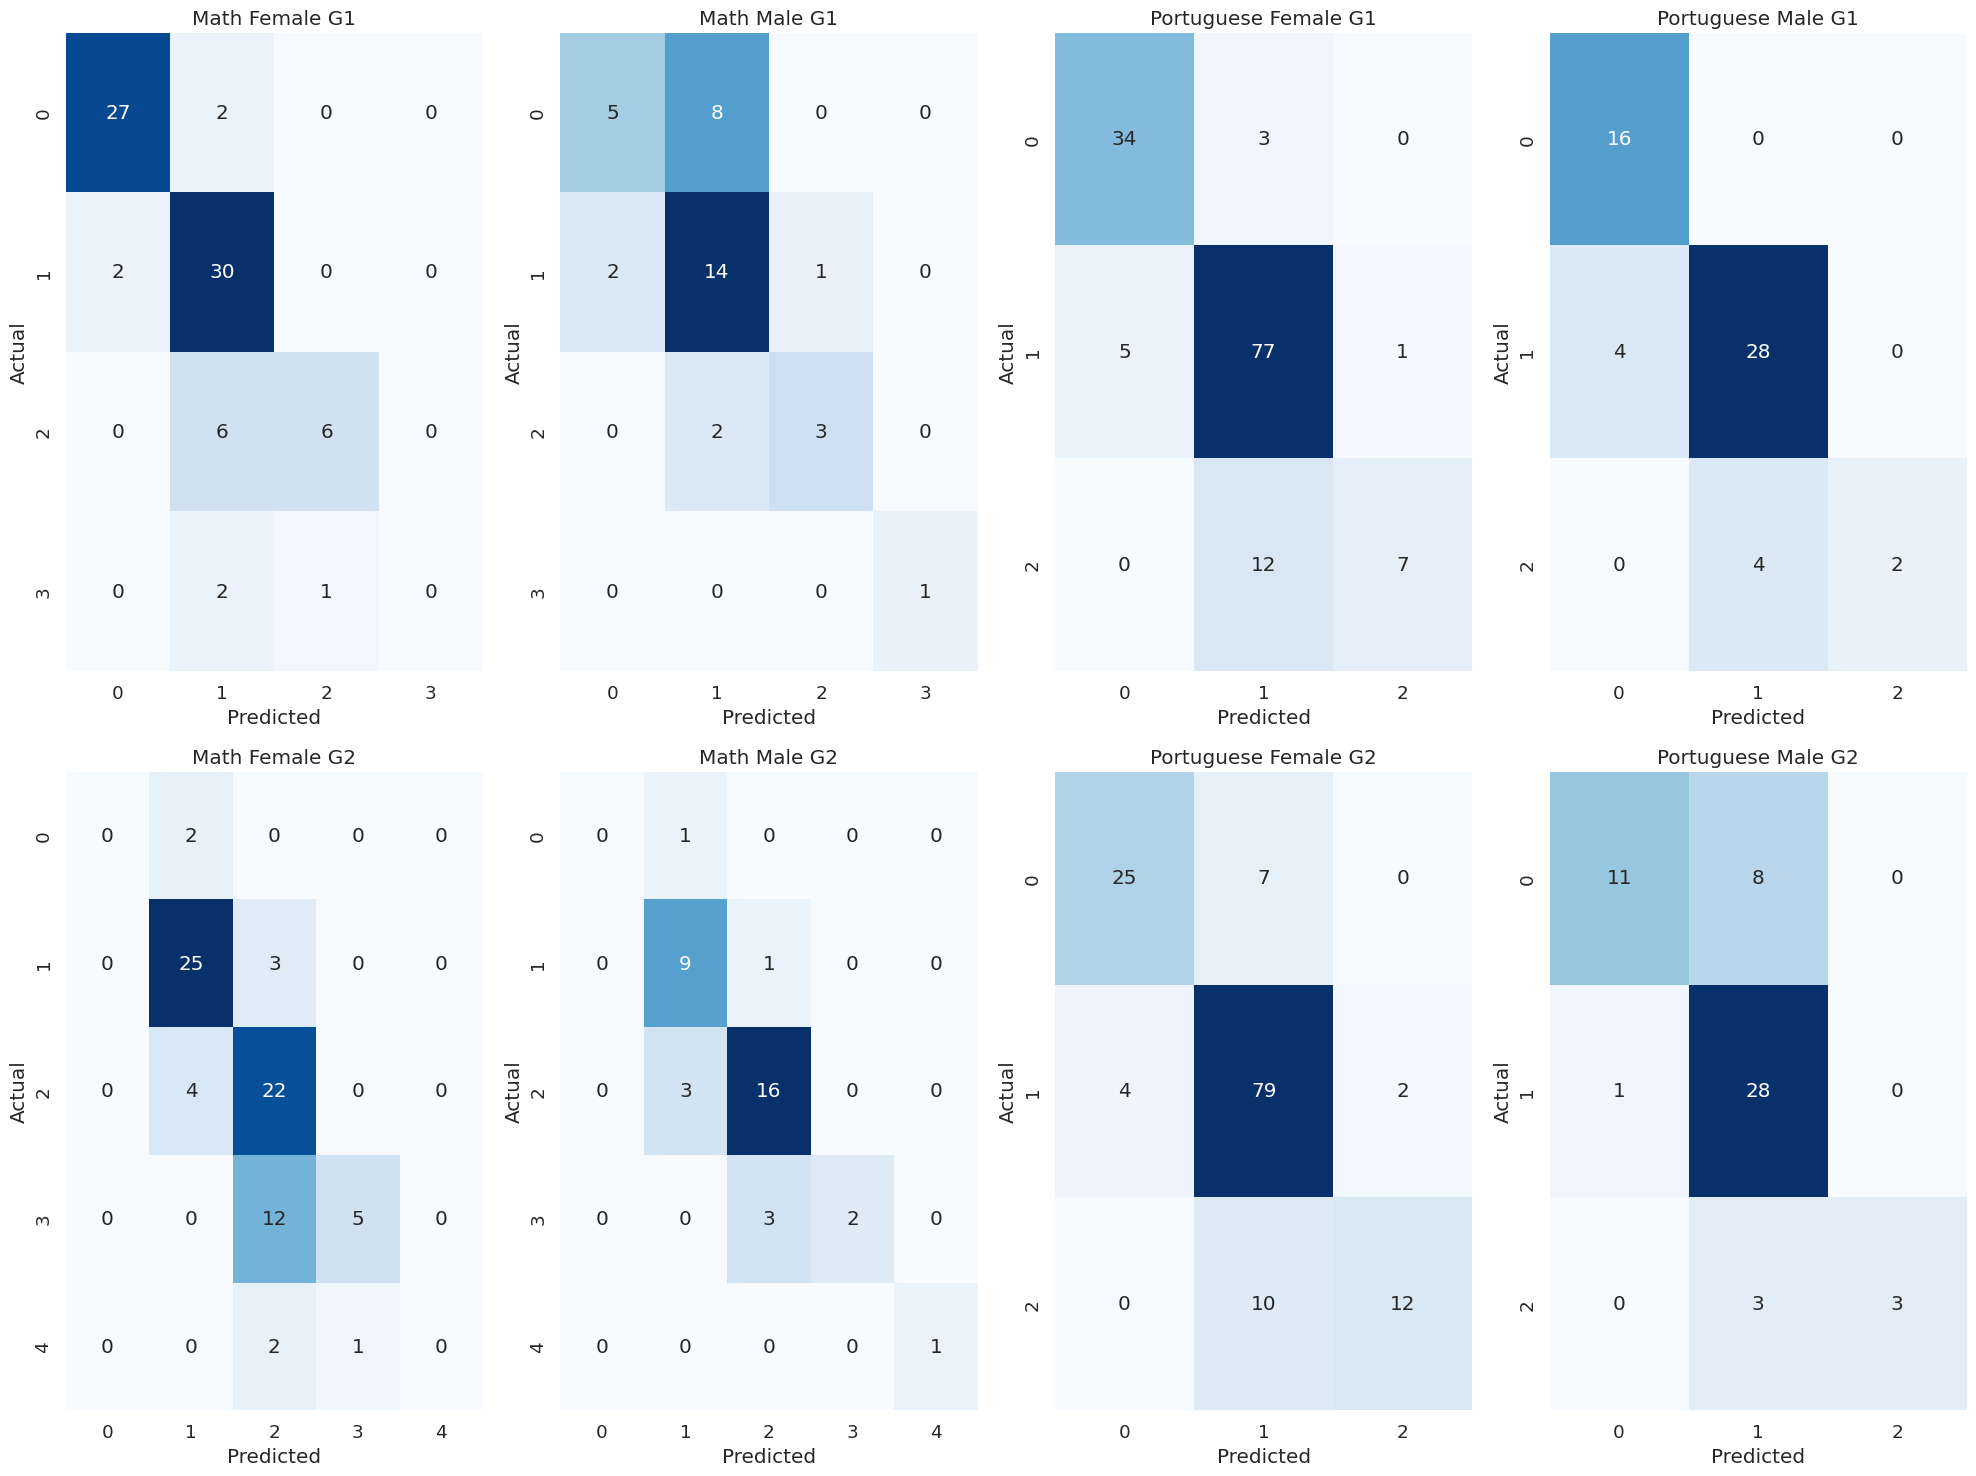

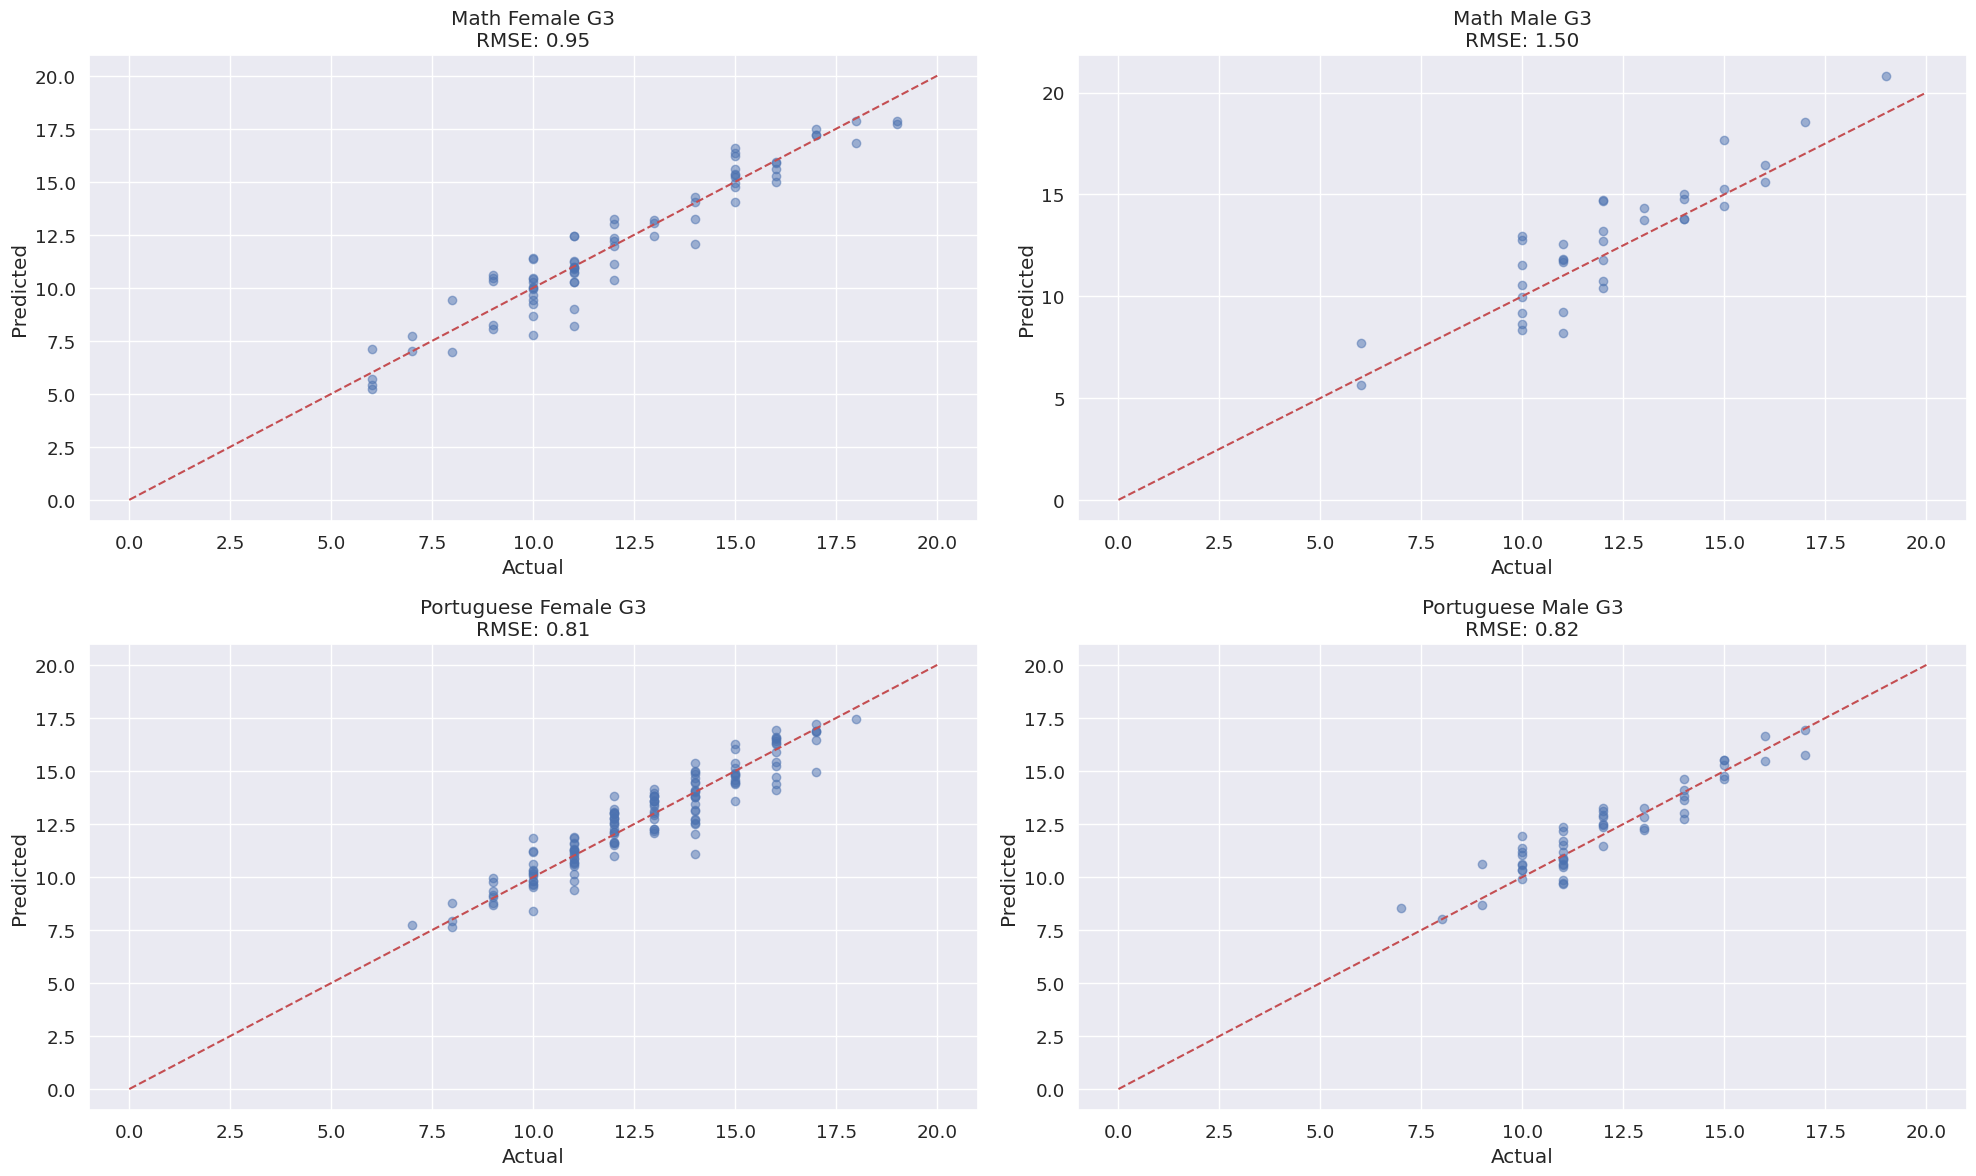

In [13]:
# Create output directory
os.makedirs('visualizations', exist_ok=True)

# Confusion matrices for G1 and G2 classification models
plt.figure(figsize=(20, 15))

# Math Female G1
plt.subplot(2, 4, 1)
cm = confusion_matrix(classify_grades_edu(y_test_mat_f['G1']), y_pred_g1_mat_f)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Math Female G1')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Math Male G1
plt.subplot(2, 4, 2)
cm = confusion_matrix(classify_grades_edu(y_test_mat_m['G1']), y_pred_g1_mat_m)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Math Male G1')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Portuguese Female G1
plt.subplot(2, 4, 3)
cm = confusion_matrix(classify_grades_edu(y_test_por_f['G1']), y_pred_g1_por_f)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Portuguese Female G1')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Portuguese Male G1
plt.subplot(2, 4, 4)
cm = confusion_matrix(classify_grades_edu(y_test_por_m['G1']), y_pred_g1_por_m)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Portuguese Male G1')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Math Female G2
plt.subplot(2, 4, 5)
cm = confusion_matrix(classify_grades_edu(y_test_mat_f['G2']), y_pred_g2_mat_f)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Math Female G2')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Math Male G2
plt.subplot(2, 4, 6)
cm = confusion_matrix(classify_grades_edu(y_test_mat_m['G2']), y_pred_g2_mat_m)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Math Male G2')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Portuguese Female G2
plt.subplot(2, 4, 7)
cm = confusion_matrix(classify_grades_edu(y_test_por_f['G2']), y_pred_g2_por_f)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Portuguese Female G2')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Portuguese Male G2
plt.subplot(2, 4, 8)
cm = confusion_matrix(classify_grades_edu(y_test_por_m['G2']), y_pred_g2_por_m)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Portuguese Male G2')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.savefig('visualizations/classification_confusion_matrices.png')
plt.show()


# G3 regression model evaluation
plt.figure(figsize=(20, 12))

# Math Female G3
plt.subplot(2, 2, 1)
plt.scatter(y_test_mat_f['G3'], y_pred_g3_mat_f, alpha=0.5)
plt.plot([0, 20], [0, 20], 'r--')
plt.title('Math Female G3\nRMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_test_mat_f['G3'], y_pred_g3_mat_f))))
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Math Male G3
plt.subplot(2, 2, 2)
plt.scatter(y_test_mat_m['G3'], y_pred_g3_mat_m, alpha=0.5)
plt.plot([0, 20], [0, 20], 'r--')
plt.title('Math Male G3\nRMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_test_mat_m['G3'], y_pred_g3_mat_m))))
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Portuguese Female G3
plt.subplot(2, 2, 3)
plt.scatter(y_test_por_f['G3'], y_pred_g3_por_f, alpha=0.5)
plt.plot([0, 20], [0, 20], 'r--')
plt.title('Portuguese Female G3\nRMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_test_por_f['G3'], y_pred_g3_por_f))))
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Portuguese Male G3
plt.subplot(2, 2, 4)
plt.scatter(y_test_por_m['G3'], y_pred_g3_por_m, alpha=0.5)
plt.plot([0, 20], [0, 20], 'r--')
plt.title('Portuguese Male G3\nRMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_test_por_m['G3'], y_pred_g3_por_m))))
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.savefig('visualizations/regression_predictions.png')
plt.show()

### Model performance metrics evaluation

In [14]:
# Model performance metrics summary
performance = []

# Mathematics Female
g1_acc_mat_f = accuracy_score(classify_grades_edu(y_test_mat_f['G1']), y_pred_g1_mat_f)
g2_acc_mat_f = accuracy_score(classify_grades_edu(y_test_mat_f['G2']), y_pred_g2_mat_f)
g3_rmse_mat_f = np.sqrt(mean_squared_error(y_test_mat_f['G3'], y_pred_g3_mat_f))
g3_r2_mat_f = r2_score(y_test_mat_f['G3'], y_pred_g3_mat_f)

performance.append({
    'Subject': 'Mathematics',
    'Gender': 'Female',
    'G1 Accuracy': f'{g1_acc_mat_f:.4f}',
    'G2 Accuracy': f'{g2_acc_mat_f:.4f}',
    'G3 RMSE': f'{g3_rmse_mat_f:.4f}',
    'G3 R²': f'{g3_r2_mat_f:.4f}'
})

# Mathematics Male
g1_acc_mat_m = accuracy_score(classify_grades_edu(y_test_mat_m['G1']), y_pred_g1_mat_m)
g2_acc_mat_m = accuracy_score(classify_grades_edu(y_test_mat_m['G2']), y_pred_g2_mat_m)
g3_rmse_mat_m = np.sqrt(mean_squared_error(y_test_mat_m['G3'], y_pred_g3_mat_m))
g3_r2_mat_m = r2_score(y_test_mat_m['G3'], y_pred_g3_mat_m)

performance.append({
    'Subject': 'Mathematics',
    'Gender': 'Male',
    'G1 Accuracy': f'{g1_acc_mat_m:.4f}',
    'G2 Accuracy': f'{g2_acc_mat_m:.4f}',
    'G3 RMSE': f'{g3_rmse_mat_m:.4f}',
    'G3 R²': f'{g3_r2_mat_m:.4f}'
})

# Portuguese Female
g1_acc_por_f = accuracy_score(classify_grades_edu(y_test_por_f['G1']), y_pred_g1_por_f)
g2_acc_por_f = accuracy_score(classify_grades_edu(y_test_por_f['G2']), y_pred_g2_por_f)
g3_rmse_por_f = np.sqrt(mean_squared_error(y_test_por_f['G3'], y_pred_g3_por_f))
g3_r2_por_f = r2_score(y_test_por_f['G3'], y_pred_g3_por_f)

performance.append({
    'Subject': 'Portuguese',
    'Gender': 'Female',
    'G1 Accuracy': f'{g1_acc_por_f:.4f}',
    'G2 Accuracy': f'{g2_acc_por_f:.4f}',
    'G3 RMSE': f'{g3_rmse_por_f:.4f}',
    'G3 R²': f'{g3_r2_por_f:.4f}'
})

# Portuguese Male
g1_acc_por_m = accuracy_score(classify_grades_edu(y_test_por_m['G1']), y_pred_g1_por_m)
g2_acc_por_m = accuracy_score(classify_grades_edu(y_test_por_m['G2']), y_pred_g2_por_m)
g3_rmse_por_m = np.sqrt(mean_squared_error(y_test_por_m['G3'], y_pred_g3_por_m))
g3_r2_por_m = r2_score(y_test_por_m['G3'], y_pred_g3_por_m)

performance.append({
    'Subject': 'Portuguese',
    'Gender': 'Male',
    'G1 Accuracy': f'{g1_acc_por_m:.4f}',
    'G2 Accuracy': f'{g2_acc_por_m:.4f}',
    'G3 RMSE': f'{g3_rmse_por_m:.4f}',
    'G3 R²': f'{g3_r2_por_m:.4f}'
})

# Display and save performance summary
performance_df = pd.DataFrame(performance)
print("Model Performance Summary:")
print(performance_df)

performance_df.to_csv('visualizations/model_performance_summary.csv', index=False)
print("\nPerformance summary saved to 'visualizations/model_performance_summary.csv'")

Model Performance Summary:
       Subject  Gender G1 Accuracy G2 Accuracy G3 RMSE   G3 R²
0  Mathematics  Female      0.8289      0.6842  0.9467  0.9116
1  Mathematics    Male      0.6389      0.7778  1.4990  0.6892
2   Portuguese  Female      0.8489      0.8345  0.8136  0.8785
3   Portuguese    Male      0.8519      0.7778  0.8160  0.8638

Performance summary saved to 'visualizations/model_performance_summary.csv'


### Feature importance distinction

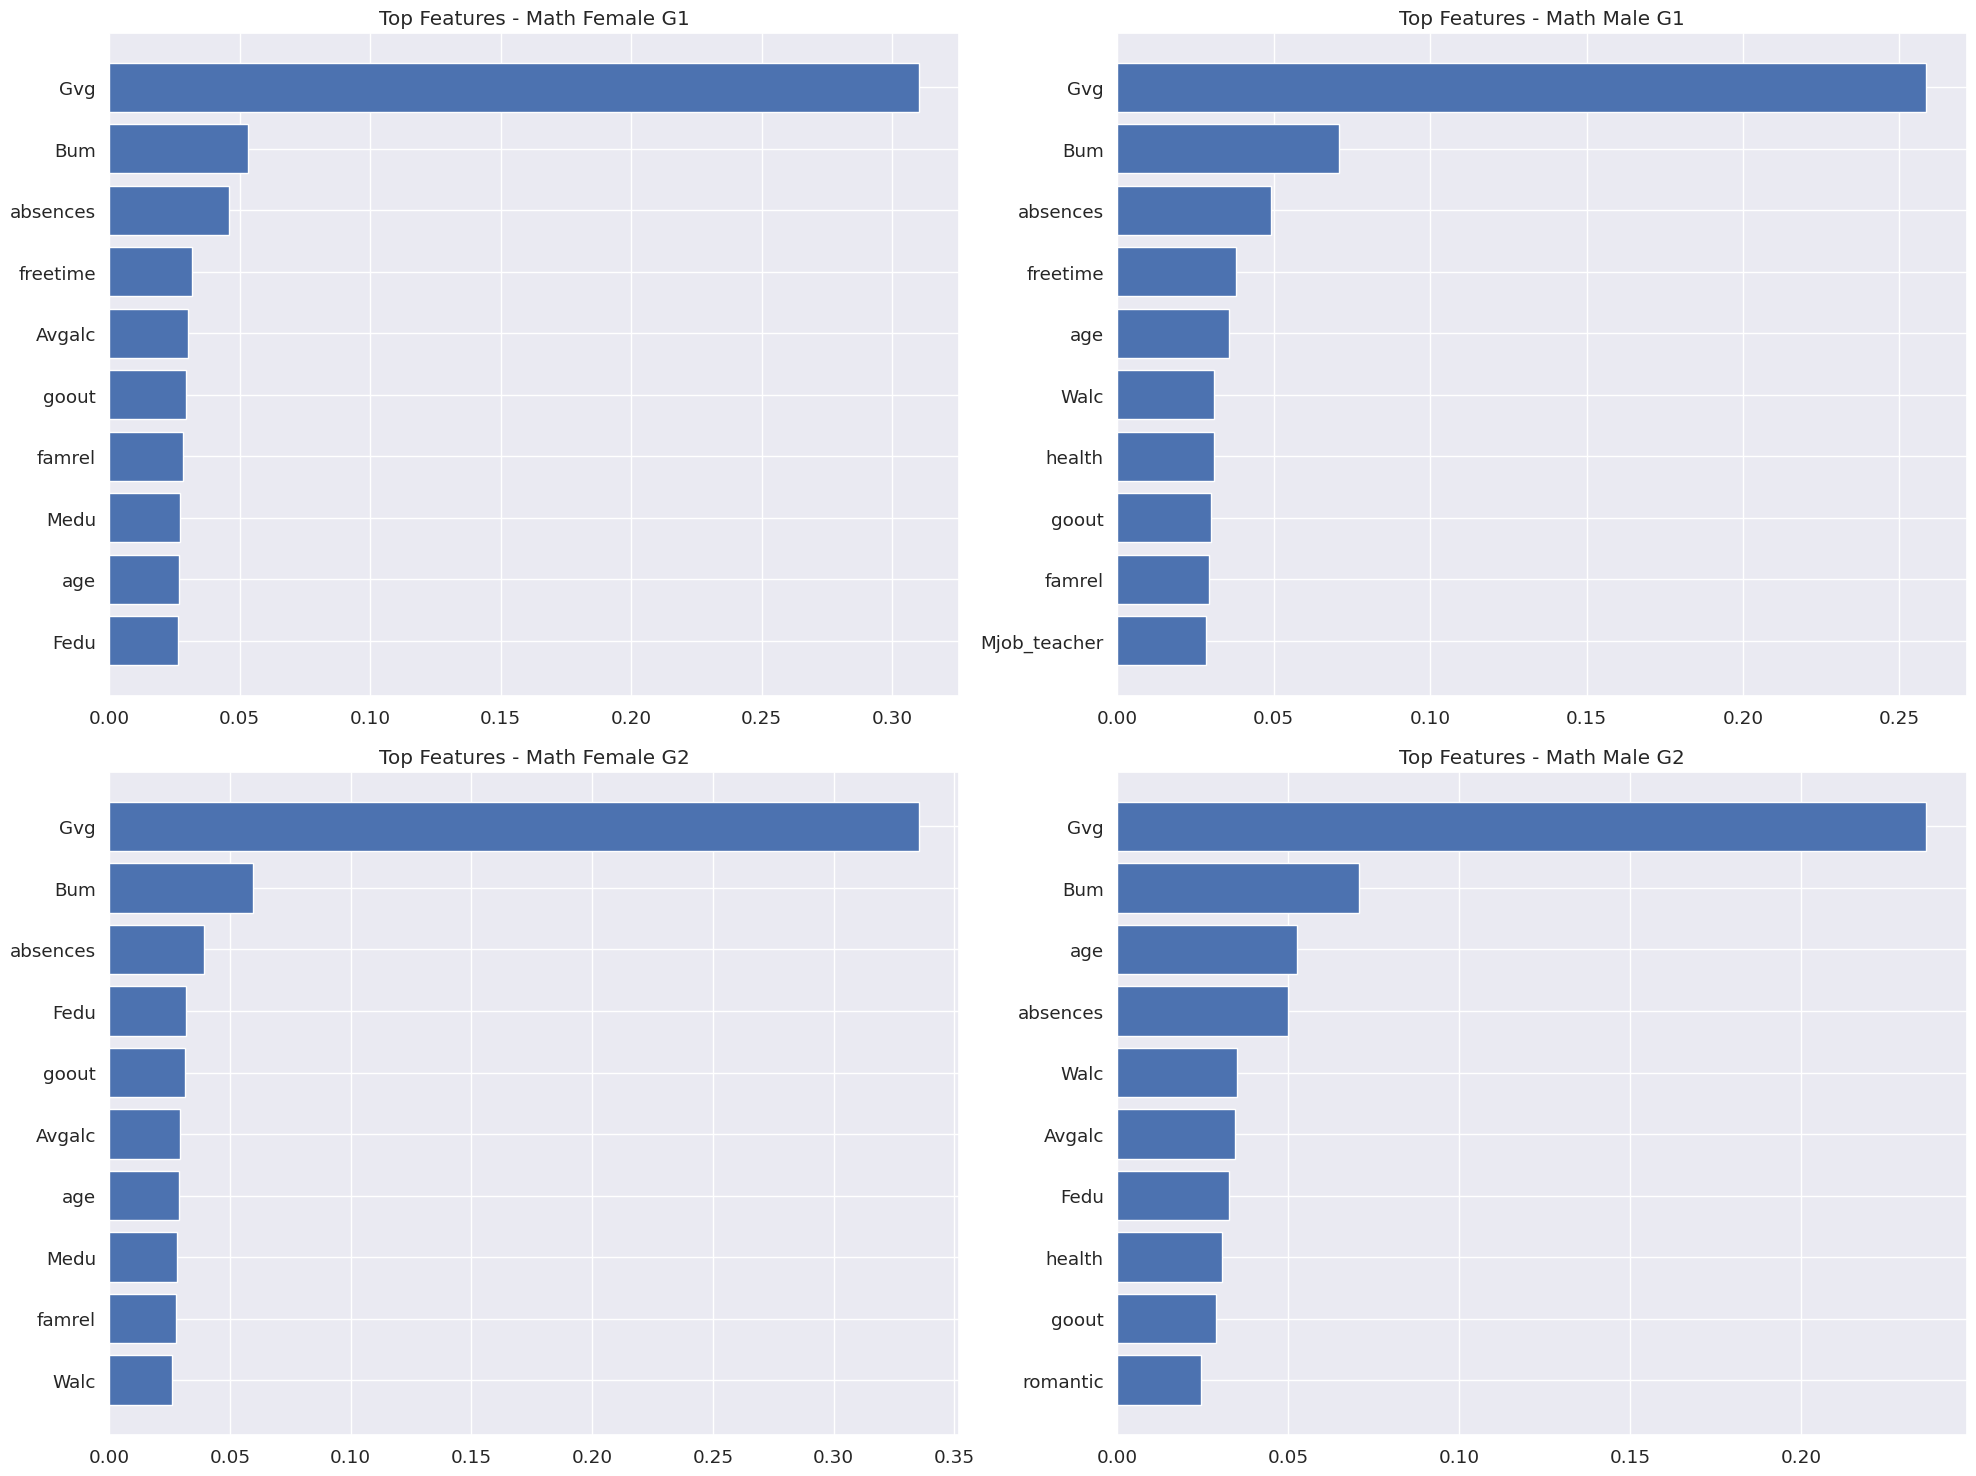

In [15]:
# Feature importance for classification models
plt.figure(figsize=(20, 15))

# Math Female G1 feature importance
plt.subplot(2, 2, 1)
importances = rf_g1_mat_f.feature_importances_
indices = np.argsort(importances)[-10:] # Get top 10 features
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), np.array(X_test_mat_f.columns)[indices])
plt.title('Top Features - Math Female G1')

# Math Male G1 feature importance
plt.subplot(2, 2, 2)
importances = rf_g1_mat_m.feature_importances_
indices = np.argsort(importances)[-10:] # Get top 10 features
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), np.array(X_test_mat_m.columns)[indices])
plt.title('Top Features - Math Male G1')

# Math Female G2 feature importance
plt.subplot(2, 2, 3)
importances = rf_g2_mat_f.feature_importances_
indices = np.argsort(importances)[-10:] # Get top 10 features
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), np.array(X_test_mat_f.columns)[indices])
plt.title('Top Features - Math Female G2')

# Math Male G2 feature importance
plt.subplot(2, 2, 4)
importances = rf_g2_mat_m.feature_importances_
indices = np.argsort(importances)[-10:] # Get top 10 features
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), np.array(X_test_mat_m.columns)[indices])
plt.title('Top Features - Math Male G2')

plt.tight_layout()
plt.savefig('visualizations/feature_importance.png')
plt.show()

### Manual prediction

In [12]:
def make_student_prediction(student_data, gender, subject):
    """
    Make grade predictions for a single student
    
    Parameters:
    student_data: dict with student features matching the training data
    gender: 'male' or 'female' 
    subject: 'mathematics' or 'portuguese'
    
    Returns:
    dict with predicted grades G1, G2, G3
    """
    # Convert student data to DataFrame with correct columns
    X = pd.DataFrame([student_data]) 
    
    # Load appropriate models based on gender and subject
    if gender == 'female' and subject == 'mathematics':
        g1_model = joblib.load('models/math_female_G1_model.joblib')
        g2_model = joblib.load('models/math_female_G2_model.joblib')
        g3_model = joblib.load('models/math_female_G3_model.joblib')
    elif gender == 'male' and subject == 'mathematics':
        g1_model = joblib.load('models/math_male_G1_model.joblib')
        g2_model = joblib.load('models/math_male_G2_model.joblib')
        g3_model = joblib.load('models/math_male_G3_model.joblib')
    elif gender == 'female' and subject == 'portuguese':
        g1_model = joblib.load('models/por_female_G1_model.joblib')
        g2_model = joblib.load('models/por_female_G2_model.joblib') 
        g3_model = joblib.load('models/por_female_G3_model.joblib')
    else:
        g1_model = joblib.load('models/por_male_G1_model.joblib')
        g2_model = joblib.load('models/por_male_G2_model.joblib')
        g3_model = joblib.load('models/por_male_G3_model.joblib')
        
    # Make predictions
    g1_pred = g1_model.predict(X)[0]
    g2_pred = g2_model.predict(X)[0]
    
    # For G3, include G1 and G2 predictions as features
    X_g3 = X.copy()
    X_g3['G1'] = g1_pred
    X_g3['G2'] = g2_pred
    g3_pred = g3_model.predict(X_g3)[0]
    
    return {
        'G1': g1_pred,
        'G2': g2_pred,
        'G3': g3_pred
    }
# Example student data matching all features from training set
student_data = {
    'school': '0',
    'sex': 0,  # 0 for female
    'age': 0.2,  # Normalized age
    'address': 0,
    'famsize': 1,
    'Pstatus': 0,
    'Medu': 1.0,
    'Fedu': 0.75,
    'traveltime': 0.0,
    'studytime': 0.5,
    'failures': 0.0,
    'schoolsup': 0,
    'famsup': 1,
    'paid': 0,
    'activities': 1,
    'nursery': 1,
    'higher': 1,
    'internet': 1,
    'romantic': 0,
    'famrel': 0.75,
    'freetime': 0.5,
    'goout': 0.25,
    'Dalc': 0.0,
    'Walc': 0.25,
    'health': 1.0,
    'absences': 0.4,
    'Mjob_at_home': False,
    'Mjob_health': False,
    'Mjob_other': False,
    'Mjob_services': True,
    'Mjob_teacher': False,
    'Fjob_at_home': False,
    'Fjob_health': False,
    'Fjob_other': False,
    'Fjob_services': True,
    'Fjob_teacher': False,
    'reason_course': False,
    'reason_home': False,
    'reason_other': False,
    'reason_reputation': True,
    'guardian_father': False,
    'guardian_mother': True,
    'guardian_other': False,
    'Gvg': 0.47,
    'Avgalc': 0.125,
    'Bum': 0.39
}

# Convert to DataFrame 
student_df = pd.DataFrame([student_data])

# Load models for a female math student as example
rf_g1 = joblib.load('models/math_female_G1_model.joblib')
rf_g2 = joblib.load('models/math_female_G2_model.joblib')
lr_g3 = joblib.load('models/math_female_G3_model.joblib')

# Make G1 and G2 predictions
g1_pred = rf_g1.predict(student_df)[0]
g2_pred = rf_g2.predict(student_df)[0]

# Add G1 and G2 predictions for G3
student_df['G1'] = g1_pred
student_df['G2'] = g2_pred

# Make G3 prediction
g3_pred = lr_g3.predict(student_df)[0]

print(f"Predicted grades:")
print(f"G1: {g1_pred:.1f}")
print(f"G2: {g2_pred:.1f}")
print(f"G3: {g3_pred:.1f}")

Predicted grades:
G1: 2.0
G2: 2.0
G3: 2.3
